In [1]:
!pip install -qU wordcloud nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 5.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates
from collections import OrderedDict

In [2]:
channels = [
    "CNN-News18",
    "Republic World",
    "India Today",
    "MIRROR NOW",
    "TIMES NOW",
    "DD INDIA",
    "WION",
    "NewsX",
]

In [3]:
df = pd.read_csv("Filtered_labelled_ge_transcripts (1).csv")

In [4]:
df

,Unnamed: 0,videoId,title,description,published_at,channel,thumbnail_url,transcripts,generated_by_youtube,original_lang,views,comments,likes,pre_processed,entities,Label
0,0,joLk0IPEniA,WILL RAFALE BE A FACTOR THIS ELECTION? | FACEO...,"RafaleTwist DAY BEFORE POLLS, RAFALE BLOW TO G...",2019-04-10T16:41:10Z,CNN-News18,https://i.ytimg.com/vi/joLk0IPEniA/hqdefault.jpg,unanimously rejected government's contention o...,True,en,470,8,5.0,unanimously reject government \n contention ...,Hindu -> NORP\ntoday -> DATE\nSupreme Court ->...,ProGov
1,1,Gc1tf5U7BuU,BJP Manifesto Promises To Secure &amp; Protect...,BattleOf2019 #ElectionsWithNews18 #LokSabhaEle...,2019-04-08T14:19:22Z,CNN-News18,https://i.ytimg.com/vi/Gc1tf5U7BuU/hqdefault.jpg,top story 18 degrees south BJP released manife...,True,en,285,2,9.0,story 18 degree south \n BJP release manifes...,18 -> CARDINAL\nBJP -> ORG\ntoday -> DATE\nsha...,ProGov
2,2,1BAgeFCwR3o,Reporters Project: Andhra Pradesh’s Politics O...,BattleOf2019 #ElectionsWithNews18 #LokSabhaEle...,2019-04-07T09:22:24Z,CNN-News18,https://i.ytimg.com/vi/1BAgeFCwR3o/hqdefault.jpg,[Music] reporters project CNN news 18 reporter...,True,en,1431,3,11.0,reporter project CNN news 18 \n reporter fan...,CNN -> ORG\n18 -> CARDINAL\nApril 11th -> DATE...,ProGov
3,3,HKCBxHhnfC4,Reporters Project: Giving Voice To The Real Is...,BattleOf2019 #ElectionsWithNews18 #LokSabhaEle...,2019-04-07T09:20:19Z,CNN-News18,https://i.ytimg.com/vi/HKCBxHhnfC4/hqdefault.jpg,[Music] reporters project record stories CNN n...,True,en,146,2,2.0,reporter project \n record story CNN news 18...,CNN news -> ORG\n18 -> CARDINAL\nPakistan -> G...,AntiGov
4,4,iLlUz3a4zDg,“I Definitely Don&#39;t Fight A War To Lose” –...,On Off Centre Anuradha SenGupta is talking to ...,2019-04-06T10:28:52Z,CNN-News18,https://i.ytimg.com/vi/iLlUz3a4zDg/hqdefault.jpg,[Music] film stars stranger electoral politics...,True,en,16396,130,205.0,film star stranger electoral \n politic Lok ...,Lok Sabha -> ORG\nyear -> DATE\nLok Sabha -> O...,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,1363,V1pyuUKGEvw,"CBI Selection Panel To Meet On 24th January, 2019",Republic TV is India's no.1 English news chann...,2019-01-16T12:14:38Z,Republic World,https://i.ytimg.com/vi/V1pyuUKGEvw/hqdefault.jpg,breaking news coming far entire internal battl...,True,en,361,0,4.0,breaking news come far \n entire internal ba...,CBI -> ORG\nCBI -> ORG\nAlok Varma -> PERSON\n...,Neutral
1260,1364,qx0a2coAYz4,Church Body&#39;s Letter Accessed By Republic ...,Republic TV is India's no.1 English news chann...,2019-01-16T11:29:33Z,Republic World,https://i.ytimg.com/vi/qx0a2coAYz4/hqdefault.jpg,Oh leave convent editor dungeon fact official ...,True,en,705,6,19.0,oh leave convent editor \n dungeon fact offi...,Jesus -> PERSON\nAlfea -> PERSON\nJesus -> PER...,Neutral
1261,1365,OVUMiE3tCc8,Four Nuns Who Spoke Against Franco Mulakkal Sh...,Republic TV is India's no.1 English news chann...,2019-01-16T11:15:26Z,Republic World,https://i.ytimg.com/vi/OVUMiE3tCc8/hqdefault.jpg,pull away uh breaking update Santa Fe's gettin...,True,en,16305,47,104.0,pull away uh break \n update Santa Fe gettin...,Santa Fe -> ORG\nFranco -> PERSON\nKerala -> G...,AntiGov
1262,1366,mF09iL30OCY,"After Being Dumped By SP-BSP, Rahul Gandhi For...",Republic TV is India's no.1 English news chann...,2019-01-15T06:14:38Z,Republic World,https://i.ytimg.com/vi/mF09iL30OCY/hqdefault.jpg,let's quickly turn attention Congress party sn...,True,en,364,3,6.0,let quickly turn attention \n Congress party...,Congress -> ORG\nAkhilesh Yadav -> PERSON\nnot...,Neutral


In [5]:
df["channel"] = df["channel"].apply(lambda x: "DD INDIA" if x == "S1mple" else x)

In [6]:
df["channel"].value_counts()

channel
WION              310
MIRROR NOW        204
India Today       168
DD INDIA          127
Republic World    124
NewsX             119
TIMES NOW         107
CNN-News18        105
Name: count, dtype: int64

In [7]:
df["Label"].value_counts()

Label
Neutral    598
ProGov     576
AntiGov     90
Name: count, dtype: int64

In [8]:
categorical_label = pd.Series(df["Label"], dtype="category")
categorical_channels = [channels.index(a) for a in df["channel"]]

Text(0, 0.5, 'Number of videos')

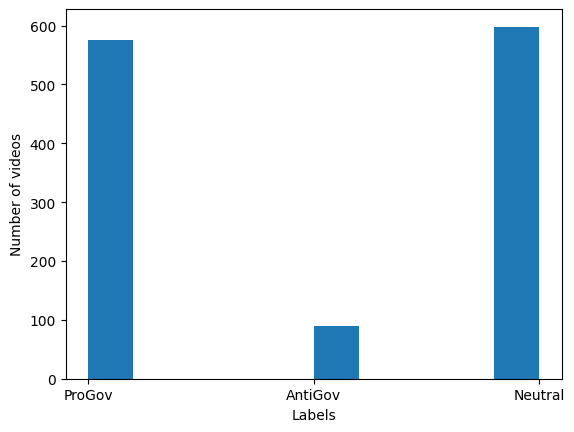

In [9]:
plt.hist(categorical_label)
plt.xlabel("Labels")
plt.ylabel("Number of videos")

In [10]:
df["channel"].value_counts()

channel
WION              310
MIRROR NOW        204
India Today       168
DD INDIA          127
Republic World    124
NewsX             119
TIMES NOW         107
CNN-News18        105
Name: count, dtype: int64

Text(0, 0.5, 'Label generated using mathematical model')

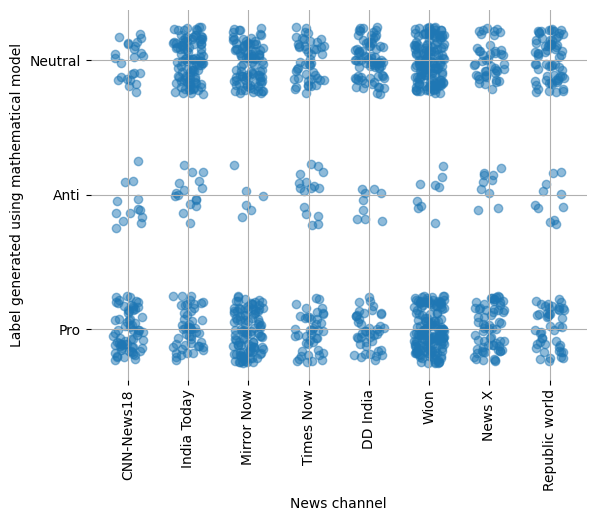

In [11]:
new = df.copy()
new["Label"] = pd.factorize(df['Label'])[0] + 1
new["channel"] = pd.factorize(df['channel'])[0] + 1

xnoise, ynoise = np.random.random(len(df))/2, np.random.random(len(df))/2 # The noise is in the range 0 to 0.5

# Plot the scatterplot
plt.scatter(new["channel"].apply(lambda x: float(x))+xnoise, new["Label"].apply(lambda x: float(x))+ynoise, alpha=0.5)
# You can also set xticks and yticks to be your category names:
plt.xticks([1.25, 2.25, 3.25, 4.25, 5.25, 6.25, 7.25, 8.25], ["CNN-News18", "India Today", "Mirror Now", "Times Now", "DD India", "Wion", "News X", "Republic world"], rotation = 90) # The reason the xticks start at 0.25
plt.yticks([1.25, 2.25, 3.25], ["Pro", "Anti", "Neutral"])

plt.grid()
sns.despine(left=True, bottom=True)
plt.xlabel("News channel")
plt.ylabel("Label generated using mathematical model")

Text(0, 0.5, 'Number of uploaded videos')

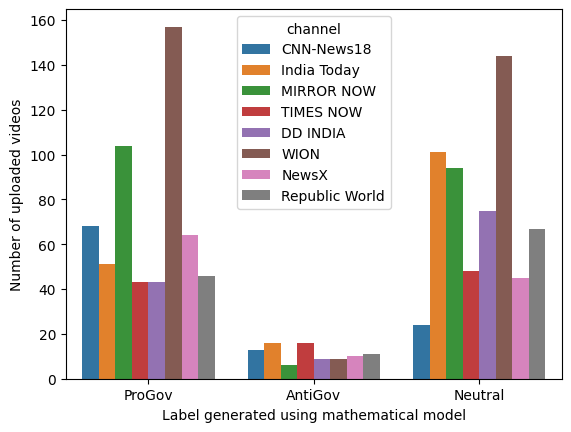

In [12]:
sns.countplot(x='Label', hue="channel", data=df)
plt.xlabel("Label generated using mathematical model")
plt.ylabel("Number of uploaded videos")

Text(0, 0.5, 'Number of likes')

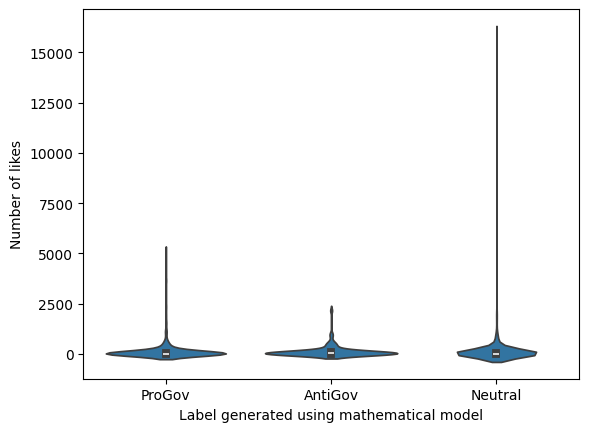

In [13]:
sns.violinplot(x="Label", y="likes", data=df)
plt.xlabel("Label generated using mathematical model")
plt.ylabel("Number of likes")

Text(0, 0.5, 'Number of comments')

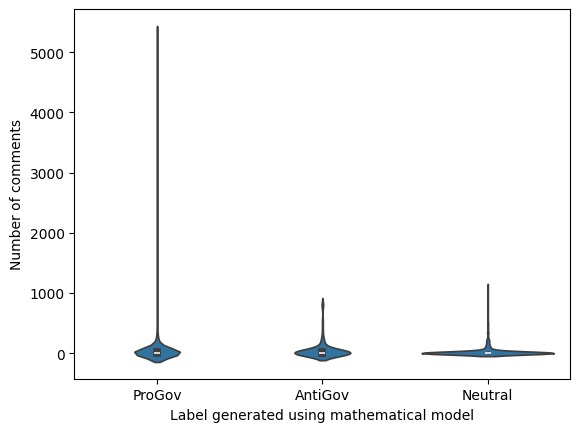

In [14]:
sns.violinplot(x="Label", y="comments", data=df)
plt.xlabel("Label generated using mathematical model")
plt.ylabel("Number of comments")

Text(0, 0.5, 'Number of views')

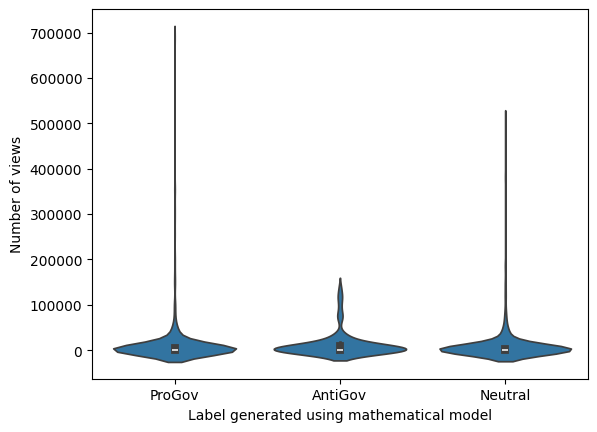

In [15]:
sns.violinplot(x="Label", y="views", data=df)
plt.xlabel("Label generated using mathematical model")
plt.ylabel("Number of views")

In [16]:
x = [dt.datetime.strptime(d.split("T")[0],'%Y-%m-%d').date() for d in df["published_at"]]
vid_freq = {}
for _, row in df.iterrows():
    if row["published_at"].split("T")[0] in vid_freq:
        vid_freq[row["published_at"].split("T")[0]] += 1
    else:
        vid_freq[row["published_at"].split("T")[0]] = 1

In [17]:
ordered = OrderedDict(sorted(vid_freq.items(), key=lambda t: t[0]))

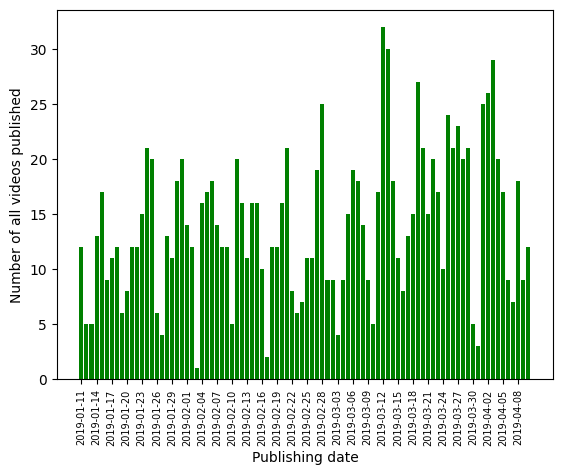

In [18]:
plt.xticks(rotation=90, fontsize=7)
plt.bar(ordered.keys(), ordered.values(), color='g');
plt.xlabel("Publishing date")
plt.ylabel("Number of all videos published")
plt.xticks(list(ordered.keys())[::3]);

In [19]:
x = [dt.datetime.strptime(d.split("T")[0],'%Y-%m-%d').date() for d in df[df["Label"] == "Neutral"]["published_at"]]
vid_freq_neutral = {}
for _, row in df[df["Label"] == "Neutral"].iterrows():
    if row["published_at"].split("T")[0] in vid_freq_neutral:
        vid_freq_neutral[row["published_at"].split("T")[0]] += 1
    else:
        vid_freq_neutral[row["published_at"].split("T")[0]] = 1

In [20]:
ordered_neutral = OrderedDict(sorted(vid_freq_neutral.items(), key=lambda t: t[0]))

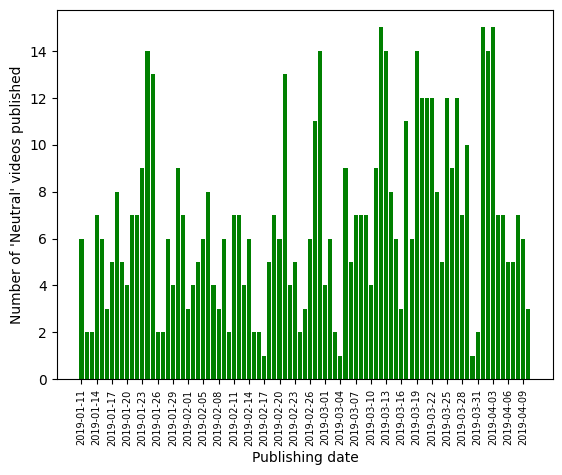

In [21]:
plt.xticks(rotation=90, fontsize=7)
plt.bar(ordered_neutral.keys(), ordered_neutral.values(), color='g');
plt.xlabel("Publishing date")
plt.ylabel("Number of 'Neutral' videos published")
plt.xticks(list(ordered_neutral.keys())[::3]);

In [22]:
x = [dt.datetime.strptime(d.split("T")[0],'%Y-%m-%d').date() for d in df[df["Label"] == "ProGov"]["published_at"]]
vid_freq_pro = {}
for _, row in df[df["Label"] == "ProGov"].iterrows():
    if row["published_at"].split("T")[0] in vid_freq_pro:
        vid_freq_pro[row["published_at"].split("T")[0]] += 1
    else:
        vid_freq_pro[row["published_at"].split("T")[0]] = 1

In [23]:
ordered_pro = OrderedDict(sorted(vid_freq_pro.items(), key=lambda t: t[0]))

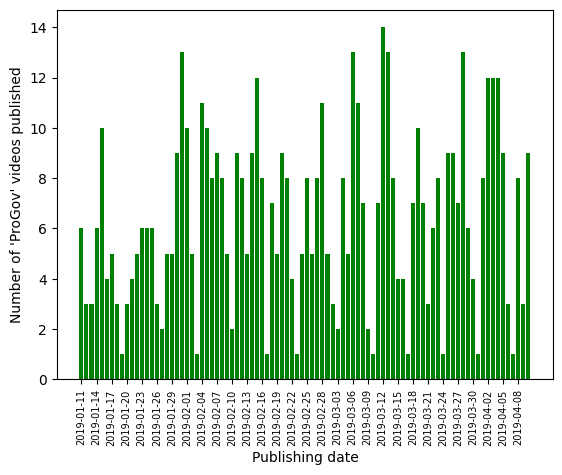

In [24]:
plt.xticks(rotation=90, fontsize=7)
plt.bar(ordered_pro.keys(), ordered_pro.values(), color='g');
plt.xlabel("Publishing date")
plt.ylabel("Number of 'ProGov' videos published")
plt.xticks(list(ordered_pro.keys())[::3]);

In [26]:
x = [dt.datetime.strptime(d.split("T")[0],'%Y-%m-%d').date() for d in df[df["Label"] == "AntiGov"]["published_at"]]
vid_freq_anti = {}
for _, row in df[df["Label"] == "AntiGov"].iterrows():
    if row["published_at"].split("T")[0] in vid_freq_anti:
        vid_freq_anti[row["published_at"].split("T")[0]] += 1
    else:
        vid_freq_anti[row["published_at"].split("T")[0]] = 1

In [27]:
ordered_anti = OrderedDict(sorted(vid_freq_anti.items(), key=lambda t: t[0]))

Text(0, 0.5, "Number of 'AntiGov' videos published")

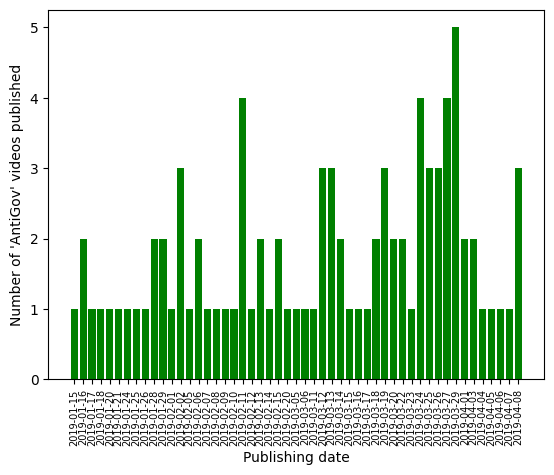

In [32]:
plt.xticks(rotation=90, fontsize=7)
plt.bar(ordered_anti.keys(), ordered_anti.values(), color='g');
plt.xlabel("Publishing date")
plt.ylabel("Number of 'AntiGov' videos published")
# plt.xticks(list(ordered_pro.keys())[::3]);

In [31]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
custom_list = ['said', 'say', 'one', 'well', 'says', 'know', 'put', 'something', 'another', 'music', 'got', 'talking', 'called', 'go', 'want', 'thing', 'going', 'yeah', 'ye', 'yes', 'new',
               'try', 'oh', 'car']

def remove_stopwords(df, column_name, language='english'):
    stop_words = set(stopwords.words(language))
    df[column_name] = df[column_name].astype(str).apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words and word.lower() not in custom_list]))
    return df

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

df = remove_stopwords(df, 'transcripts')

comment_words = ''
stopwords = set(STOPWORDS)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saransh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ModuleNotFoundError: No module named 'wordcloud'

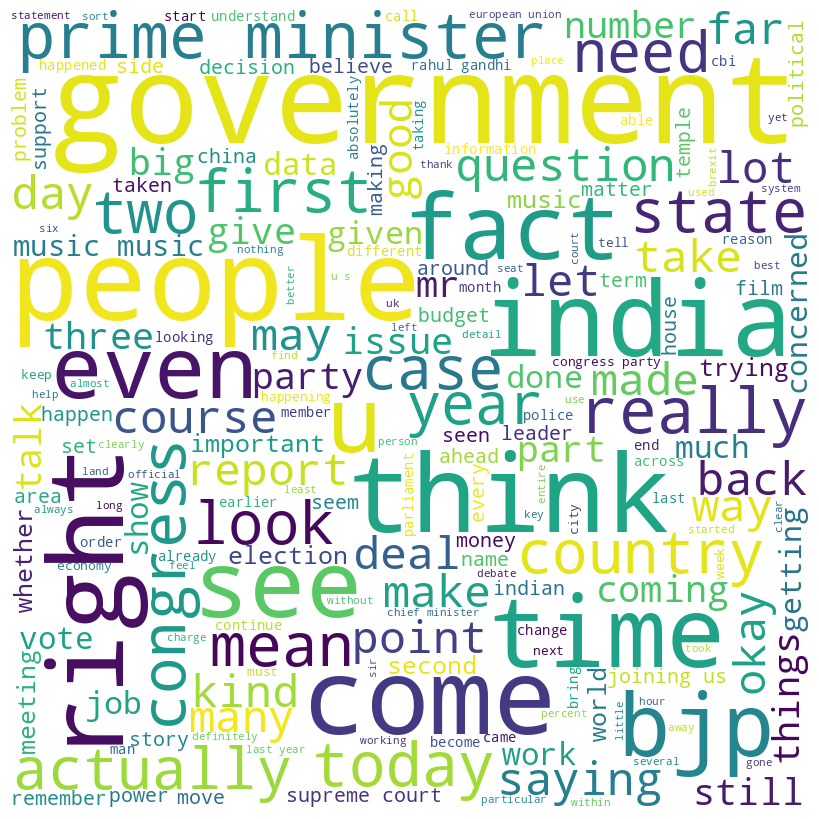

In [8]:
# iterate through the csv file
new_df = df[df["published_at"].apply(lambda x: x.split("-")[1]) == "01"]

for val in new_df.transcripts:

	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()

	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()

	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

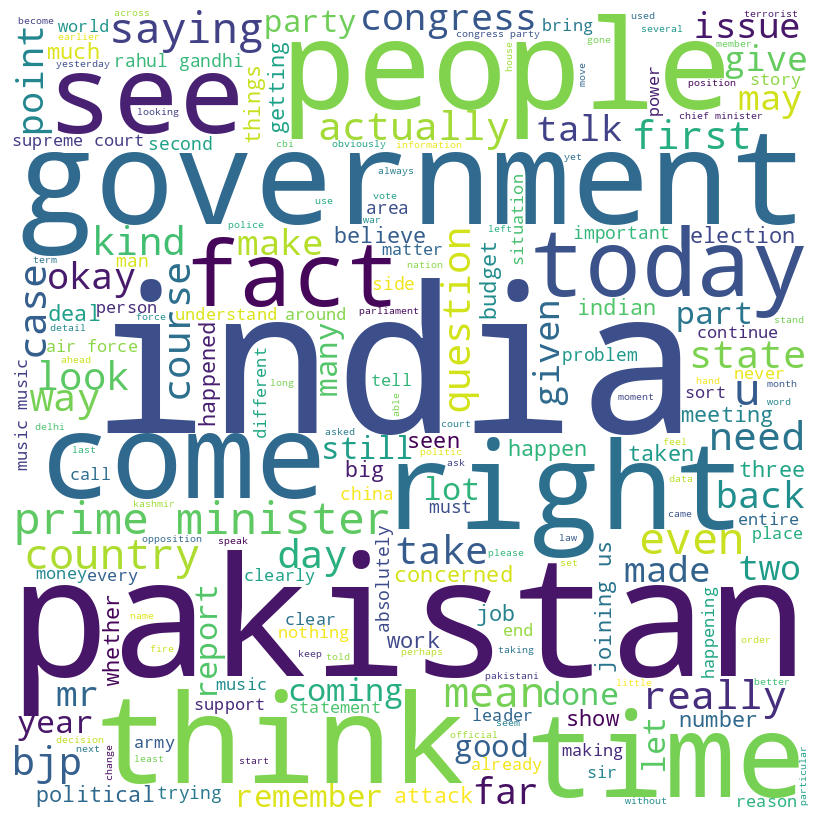

In [9]:
# iterate through the csv file
new_df = df[df["published_at"].apply(lambda x: x.split("-")[1]) == "02"]

for val in new_df.transcripts:

	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()

	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()

	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


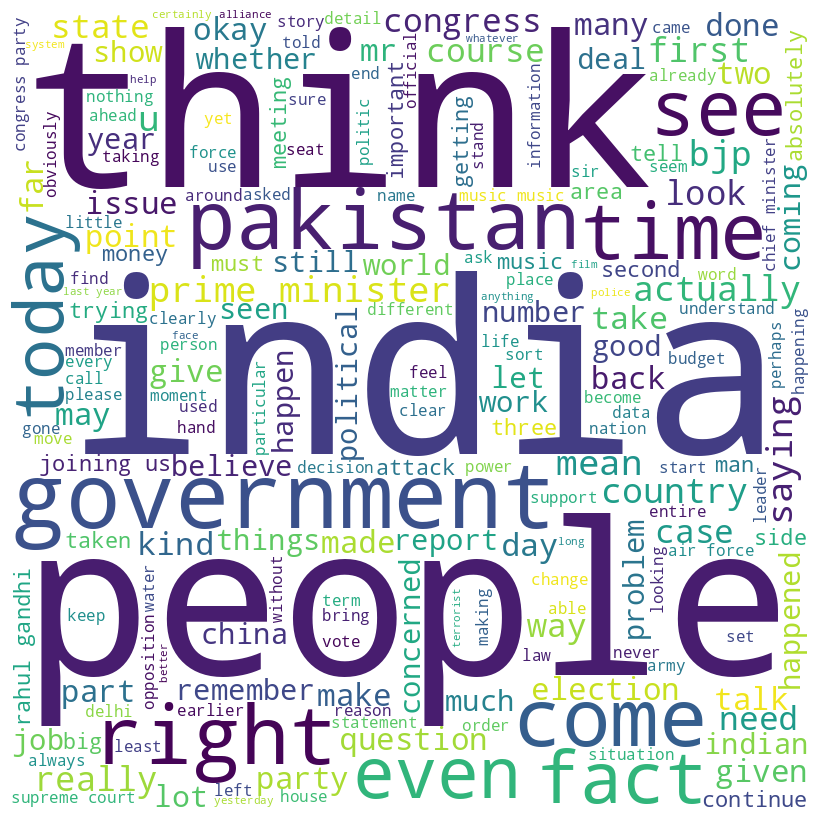

In [10]:
# iterate through the csv file
new_df = df[df["published_at"].apply(lambda x: x.split("-")[1]) == "03"]

for val in new_df.transcripts:

	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()

	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()

	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

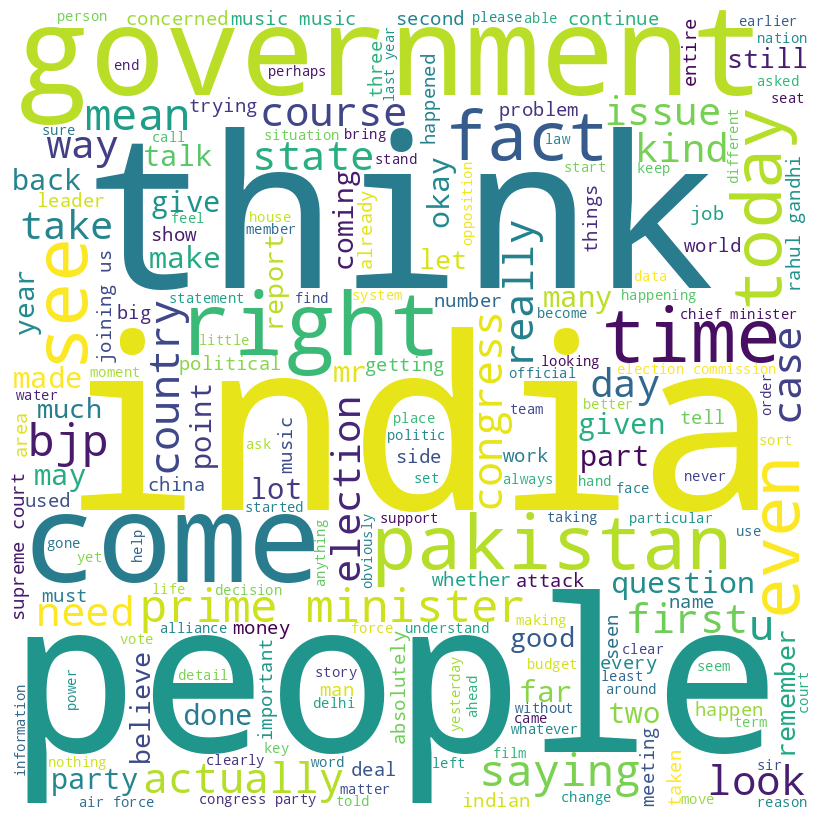

In [11]:
# iterate through the csv file
new_df = df[df["published_at"].apply(lambda x: x.split("-")[1]) == "04"]

for val in new_df.transcripts:

	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()

	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()

	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()